In [1]:
from asap.util.io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
from asap.data.dataloader import DataSet
from asap.annotation import ASAPNMF
from asap.util import topics
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import logging

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

sample_in = args.home + args.experiment + args.input+ args.sample_id +'/'+args.sample_id
sample_out = args.home + args.experiment + args.output+ args.sample_id +'/'+args.sample_id


logging.basicConfig(filename=sample_out+'_model.log',
                        format='%(asctime)s %(levelname)-8s %(message)s',
                        level=logging.INFO,
                        datefmt='%Y-%m-%d %H:%M:%S')

tree_max_depth = 10
num_factors = 10
batch_size = 10000
batch_iteration = 1
downsample_pseudobulk = False
downsample_size = 10

dl = DataSet(sample_in,sample_out)
sample_list = dl.get_samplenames()
dl.initialize_data(sample_list,batch_size)
asap = ASAPNMF(dl,tree_max_depth,num_factors,downsample_pseudobulk,downsample_size)
asap.method

X_rows = dl.mtx.shape[0]
tree_max_depth = 10

rp_mat = []
for _ in range(tree_max_depth):
    rp_mat.append(np.random.normal(size = (X_rows,1)).flatten())                      
rp_mat = np.asarray(rp_mat)
pbulk=asap.generate_pbulk_mat(asap.adata.mtx,rp_mat,asap.adata.batch_label)




In [2]:
pbulk.shape

(36511, 502)

In [12]:
u, _, _ = np.linalg.svd(pbulk.T,full_matrices=False)
u.shape

(502, 502)

In [13]:
from asap.model import nmf
mu = nmf.als(u[:,:50],10,25)

iteration 1: 7.238817024922083
iteration 2: 6.972442624108431
iteration 3: 6.8670759095496505
iteration 4: 6.7986278832477565
iteration 5: 6.755108254941799
iteration 6: 6.7295939815012895
iteration 7: 6.71373178656485
iteration 8: 6.702732602824796
iteration 9: 6.694520144455281
iteration 10: 6.689276881828875
iteration 11: 6.68524326395858
iteration 12: 6.681612640847952
iteration 13: 6.6786393080973
iteration 14: 6.6763281200654125
iteration 15: 6.674346268982615
iteration 16: 6.672728063027185
iteration 17: 6.67094337718045
iteration 18: 6.669156270544016
iteration 19: 6.667412442954309
iteration 20: 6.6659057733071405
iteration 21: 6.665143861186895
iteration 22: 6.6645523981856805
iteration 23: 6.664019378734815
iteration 24: 6.6633963648646715
iteration 25: 6.66267096873835


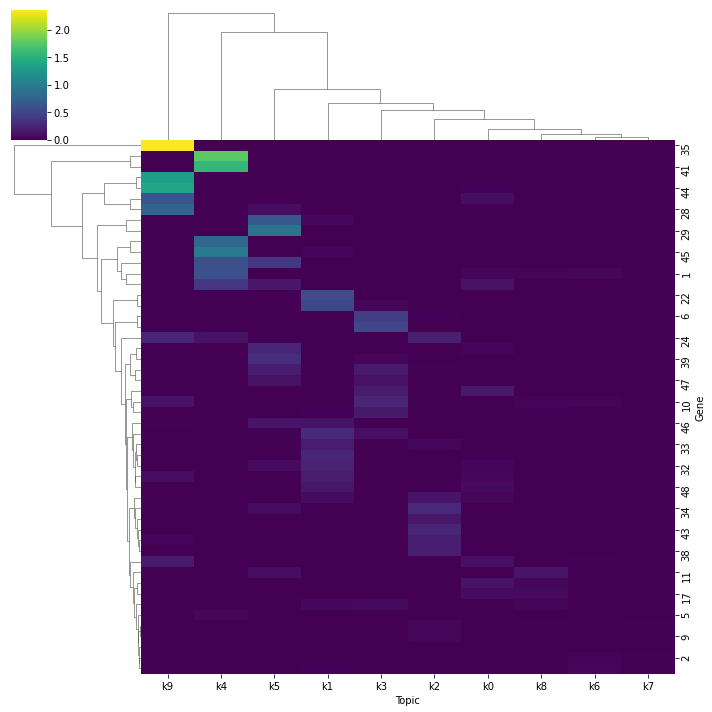

In [14]:
df_beta = pd.DataFrame(mu['H'])
df_beta.shape
df_top = topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=50)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
# df_top[df_top>20] = 20
sns.clustermap(df_top.T,cmap='viridis')

In [ ]:
mu = nmf.als(d.T,10,100)